You are given a generated regression dataset `D: (X, y)` along already split train and test subsets, `X_train, X_test, y_train, y_test`.

    Logistic regression tasks
    -----------------------
    1. Build a logistic regression model using sklearn.
    2. Use no-regularization and any other 2 regulartion methods.
    3. Compute the accuracy on the train and test sets (for all models).
    4. Describe what you have seen based on the experiements (minimum 150 words).
    5. Answer any questions asked in question 7.

Resources:
1. [Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#@title Data Generation (DO NOT MODIFY)
X, y = make_classification(n_samples=500, n_features=10, n_redundant=4, 
                                 n_informative=6, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Here we import Matplotlib for visualization and NumPy for array operations. We also need LogisticRegression, classification_report(), and confusion_matrix() from scikit-learn

In [ ]:
# WRITE YOUR CODE STARTING HERE
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

Logistic regression is used when the dependent variable is categorical. So we can say logistic regression is a relationship between the one dependent categorical variable with one or more nominal, ordinal, interval variables.

Sci-kit learn provides the function "sklearn.linear_model.LogisticRegression" to perform the logistic regression.

Source: https://www.projectpro.io/recipes/perform-logistic-regression-sklearn

# Building model with and without regularization.

---


Here we will explore three methods of Logistic Regression.
One with non-regularization and two with regularization. For the two regularization methods we use


1.   liblinear
2.   newton-cfg

And for non regularized we use


1.   lbfgs

We used libliner only for regularized support since it doesnt support non-regularized input as a solver. 
And newton-cfg thought doesn't support L1 regularization, it still suppports regularization.

lbfgs is passed with the penalty none which disables regularization

Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

***Note***: We tries saga initially. However for saga, it does not converge using elastic regularization.



1. With Regularization, we use liblinear and newton-cg as our solver.

In [ ]:
model1_regularized = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
model2_regularized = LogisticRegression(solver='newton-cg', random_state=0).fit(X_train, y_train)
model3_nonregularized = LogisticRegression(solver='lbfgs', random_state=0,penalty='none').fit(X_train, y_train)

Once we have created the model, we need to train it. Model fitting is the process of determining the coefficients 𝑏₀, 𝑏₁, …, 𝑏ᵣ that correspond to the best value of the cost function. we did it using .fit()

Source: https://realpython.com/logistic-regression-python/

.fit() takes x, y, and possibly observation-related weights. Then it fits the model and returns the model instance itself


Evaluate Regularized Model 1 (liblinear)
We use predict() to output the value of perdiction funcion based on probability matrix and the values of 𝑝(X), with .predict()

In [ ]:
# For libliner regularized
model1_regularized.predict(X_train)


array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,

predict() will perform a prediction for each test instance and it accepts only a single input (X_train). For classifiers and regressors, the predicted value will be in the same space as the one seen in training set. In clustering estimators, the predicted value will be an integer. The predicted values of the provided test instances will be returned in a form of an output of an array or sparse matrix as we can see here

Source: 

*   https://scipy-lectures.org/packages/scikit-learn/index.html
*   https://www.sharpsightlabs.com/blog/sklearn-predict/

Source: https://towardsdatascience.com/fit-vs-predict-vs-fit-predict-in-python-scikit-learn-f15a34a8d39f

In [ ]:
# For libliner regularized
model1_regularized.score(X_train,y_train)

0.9013333333333333

Here .score() takes the input and output as arguments and returns the ratio of the number of correct predictions to the number of observations.


Source: https://scikit-learn.org/stable/modules/model_evaluation.html

Evaluating tyhe model using confusion matrix.
We ou can get more information on the accuracy of the model with a confusion matrix. The confusion matrix shows the numbers of the following:



*   True negatives in the upper-left position
*   False negatives in the lower-left position
* False positives in the upper-right position
* True positives in the lower-right position


Source: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [ ]:
# For libliner regularized
confusion_matrix(y_train, model1_regularized.predict(X_train))

array([[164,  20],
       [ 17, 174]])

Visualize Confusion Matrix

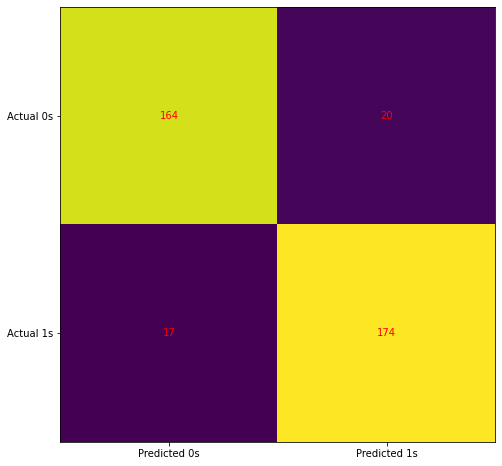

In [ ]:
# For libliner regularized
cm = confusion_matrix(y_train, model1_regularized.predict(X_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y_train, model1_regularized.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       184
           1       0.90      0.91      0.90       191

    accuracy                           0.90       375
   macro avg       0.90      0.90      0.90       375
weighted avg       0.90      0.90      0.90       375



And on the testing dataset

In [ ]:
model1_regularized.predict(X_test)




array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
model1_regularized.score(X_test,y_test)

0.872

In [ ]:
confusion_matrix(y_test, model1_regularized.predict(X_test))

array([[54, 11],
       [ 5, 55]])

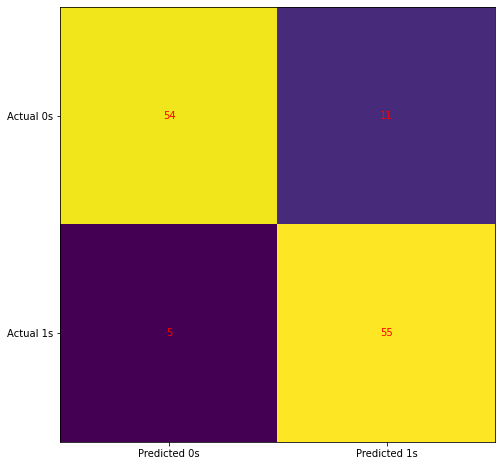

In [ ]:
cm = confusion_matrix(y_test, model1_regularized.predict(X_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y_test, model1_regularized.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        65
           1       0.83      0.92      0.87        60

    accuracy                           0.87       125
   macro avg       0.87      0.87      0.87       125
weighted avg       0.88      0.87      0.87       125



2. Using newton-cg as solver for regularized

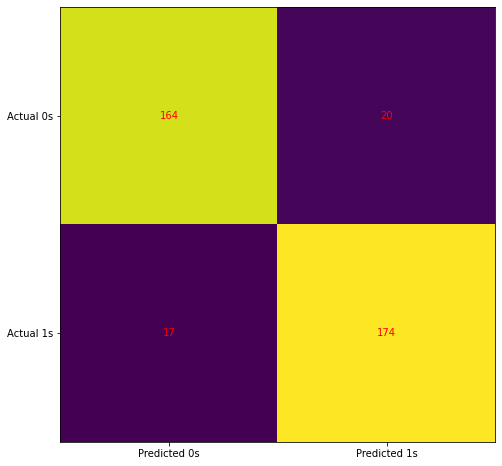

In [ ]:
model2_regularized.predict(X_train)
model2_regularized.score(X_train,y_train)
confusion_matrix(y_train, model2_regularized.predict(X_train))
cm = confusion_matrix(y_train, model2_regularized.predict(X_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y_train, model2_regularized.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       184
           1       0.90      0.91      0.90       191

    accuracy                           0.90       375
   macro avg       0.90      0.90      0.90       375
weighted avg       0.90      0.90      0.90       375



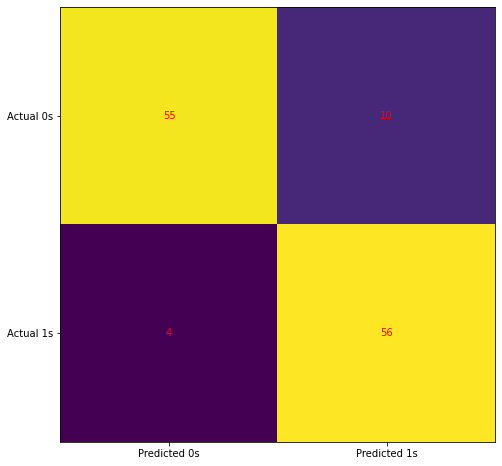

In [ ]:
model2_regularized.predict(X_test)
model2_regularized.score(X_test,y_test)
confusion_matrix(y_test, model2_regularized.predict(X_test))
cm = confusion_matrix(y_test, model2_regularized.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y_test, model2_regularized.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        65
           1       0.85      0.93      0.89        60

    accuracy                           0.89       125
   macro avg       0.89      0.89      0.89       125
weighted avg       0.89      0.89      0.89       125



3. Using lbfgs for nonregularized model

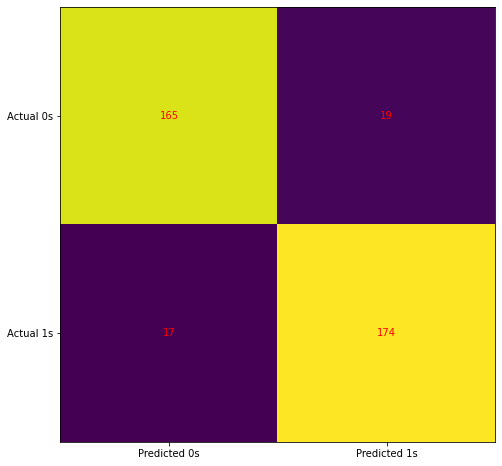

In [ ]:
model3_nonregularized.predict(X_train)
model3_nonregularized.score(X_train,y_train)
confusion_matrix(y_train, model3_nonregularized.predict(X_train))
cm = confusion_matrix(y_train, model3_nonregularized.predict(X_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y_train, model3_nonregularized.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       184
           1       0.90      0.91      0.91       191

    accuracy                           0.90       375
   macro avg       0.90      0.90      0.90       375
weighted avg       0.90      0.90      0.90       375



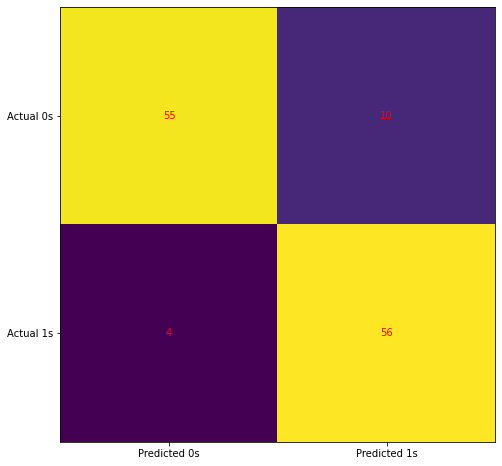

In [ ]:
model3_nonregularized.predict(X_test)
model3_nonregularized.score(X_test,y_test)
confusion_matrix(y_test, model3_nonregularized.predict(X_test))
cm = confusion_matrix(y_test, model3_nonregularized.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y_test, model3_nonregularized.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        65
           1       0.85      0.93      0.89        60

    accuracy                           0.89       125
   macro avg       0.89      0.89      0.89       125
weighted avg       0.89      0.89      0.89       125



Analysis of Regularization
Both L1 and L2 can add a penalty to the cost depending upon the model complexity, so at the place of computing the cost by using a loss function, there will be an auxiliary component, known as regularization terms, added in order to panelizing complex models. 

 

By adding regularization term, the value of weights matrices reduces by assuming that a neural network having less weights makes simpler models. And hence, it reduces the overfitting to a certain level.

* L1 regularization: It adds an L1 penalty that is equal to the absolute value of the magnitude of coefficient, or simply restricting the size of coefficients. For example, Lasso regression implements this method. 

* L2 Regularization: It adds an L2 penalty which is equal to the square of the magnitude of coefficients. For example, Ridge regression and SVM implement this method.

* Elastic Net: When L1 and L2 regularization combine together, it becomes the elastic net method, it adds a hyperparameter.


**For us we tried to use "saga" for elastic net. but it nver converged for us.
For the model1 we used libliner which uses a L1 regularization
And for model2 we used newton-cfg which uses L2 regularization**


